# Importing Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import warnings
import pickle

In [ ]:
# removing any warnings that comes with sklearn
warnings.filterwarnings('ignore')

# Data Pre-Processing

Data Augmentation

used repeated data, because the dataset is very low

In [ ]:
data = pd.read_csv('drive/MyDrive/kaggle/forestfires.csv')
second_data = pd.read_csv('drive/MyDrive/kaggle/forestfires.csv')
third_data = pd.read_csv('drive/MyDrive/kaggle/forestfires.csv')
fourth_data = pd.read_csv('drive/MyDrive/kaggle/forestfires.csv')

frames = [data, second_data, third_data, fourth_data]
data = pd.concat(frames)

data = data.drop(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'rain'], axis=1)

# Select features and target
data['fire'] = data['area'].apply(lambda x: 1 if x > 0 else 0)
data = data.drop(['area'], axis=1)

print(data.head())
print('\n')
print(data.count())

   temp  RH  wind  fire
0   8.2  51   6.7     0
1  18.0  33   0.9     0
2  14.6  33   1.3     0
3   8.3  97   4.0     0
4  11.4  99   1.8     0


temp    2068
RH      2068
wind    2068
fire    2068
dtype: int64


In [ ]:
X = data[['temp', 'RH', 'wind']]  # Features
y = data['fire']  # New binary target

In [ ]:
# Normalize the feature data
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# EDA - Data Visualization

              temp           RH         wind         fire
count  2068.000000  2068.000000  2068.000000  2068.000000
mean     18.889168    44.288201     4.017602     0.522244
std       5.802410    16.305624     1.790352     0.499626
min       2.200000    15.000000     0.400000     0.000000
25%      15.500000    33.000000     2.700000     0.000000
50%      19.300000    42.000000     4.000000     1.000000
75%      22.800000    53.000000     4.900000     1.000000
max      33.300000   100.000000     9.400000     1.000000


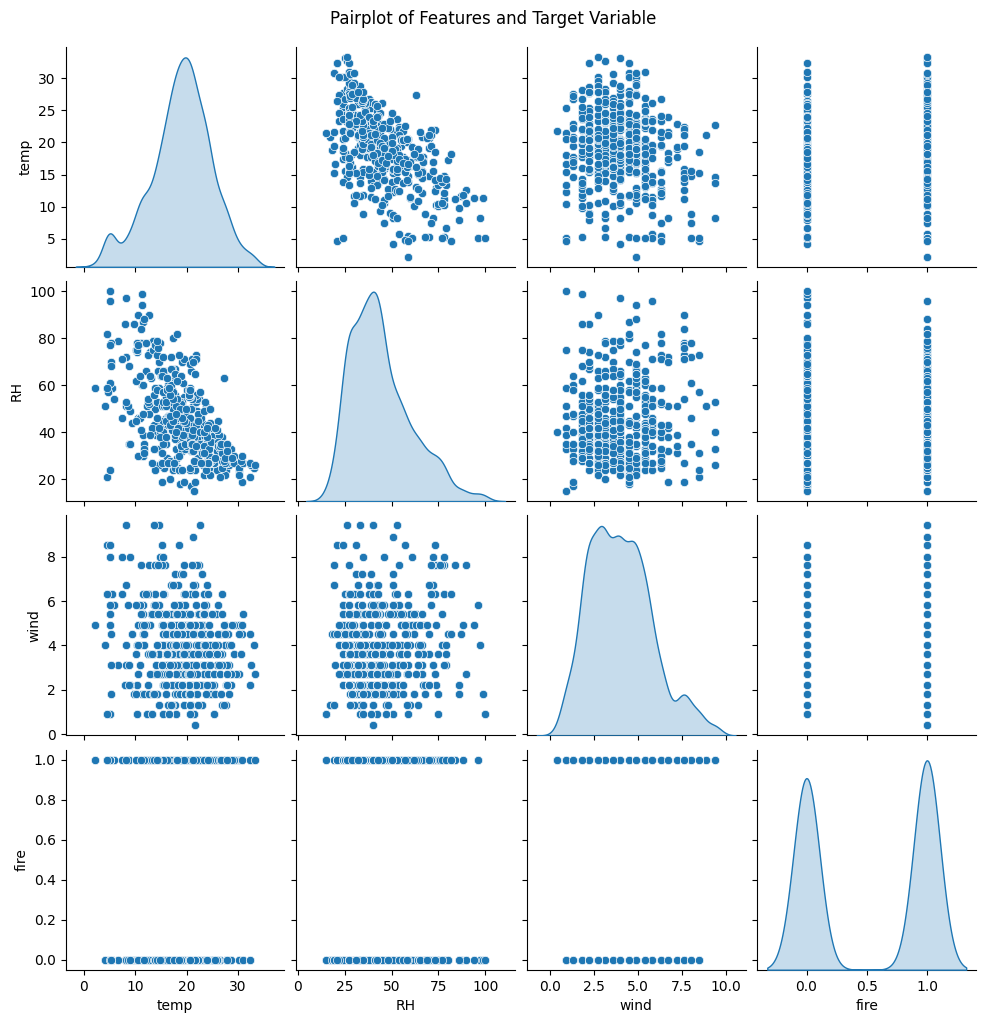

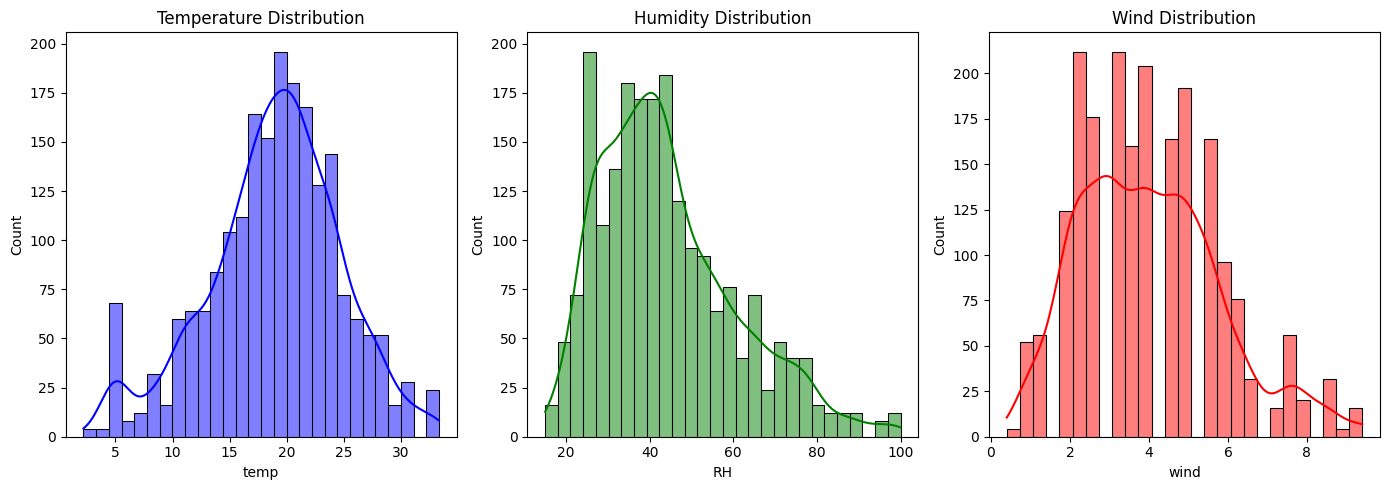

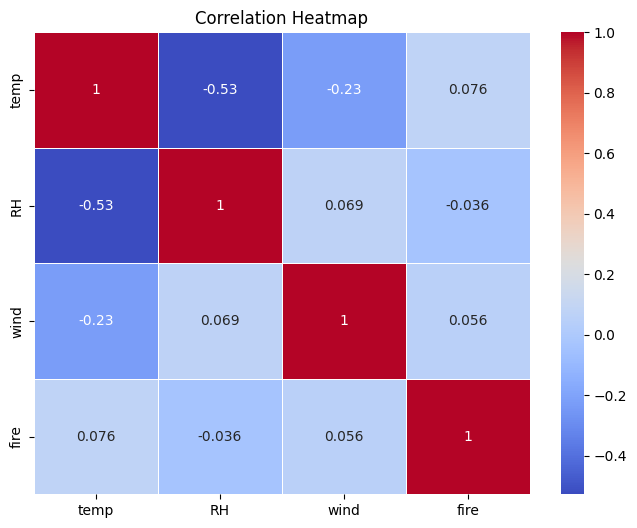

In [ ]:
# Descriptive statistics
print(data.describe())

# Pairwise relationships (scatter plot matrix)
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairplot of Features and Target Variable', y=1.02)
plt.show()

# Distribution of features
plt.figure(figsize=(14, 5))

# Temperature distribution
plt.subplot(1, 3, 1)
sns.histplot(data['temp'], kde=True, color='blue')
plt.title('Temperature Distribution')

# Humidity distribution
plt.subplot(1, 3, 2)
sns.histplot(data['RH'], kde=True, color='green')
plt.title('Humidity Distribution')

# Wind distribution
plt.subplot(1, 3, 3)
sns.histplot(data['wind'], kde=True, color='red')
plt.title('Wind Distribution')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Evaluate the models with accuracy, precision, recall, and F1-score
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name}:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\n")

# Chossing and fitting Models

In [ ]:
# Logistic Regression
log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train, y_train)
y_pred_log = log_clf.predict(X_test)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Support Vector Classifier (SVC)
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, "Logistic Regression")
# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")
# Evaluate Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree Classifier")
# Evaluate SVC
evaluate_model(y_test, y_pred_svc, "Support Vector Classifier")

Logistic Regression:
Accuracy: 0.5394524959742351
Precision: 0.5374149659863946
Recall: 0.7429467084639498
F1 Score: 0.6236842105263157

Random Forest Classifier:
Accuracy: 0.9581320450885669
Precision: 0.9621451104100947
Recall: 0.9561128526645768
F1 Score: 0.9591194968553459

Decision Tree Classifier:
Accuracy: 0.9388083735909822
Precision: 0.943217665615142
Recall: 0.9373040752351097
F1 Score: 0.940251572327044

Support Vector Classifier:
Accuracy: 0.6022544283413849
Precision: 0.5833333333333334
Recall: 0.7899686520376176
F1 Score: 0.6711051930758988



# Serialized model with pickle

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

In [ ]:
with open('model.pkl', 'rb') as f:
  model = pickle.load(f)

# Getting the Prediction

In [ ]:
def fire_prediction(temp, humidity, wind):
  input_data = [[temp, humidity, wind]]
  input_data = scaler.transform(input_data)
  prediction = model.predict(input_data)
  return f'{prediction[0]:.2f}'

In [ ]:
temp = 45
wind = 88
humidity = 15

prediction = fire_prediction(temp, humidity, wind)

print(prediction)

1.00
